<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-starmath4/blob/main/Proyecto%20final/Proyecto%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
#Librerias
import tensorflow as tf
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import pandas as pd
from sklearn.model_selection import train_test_split


%matplotlib inline

In [77]:
files=["/content/drive/MyDrive/ML2023/Food Classification dataset/Sandwich",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/Taco",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/omelette",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/sushi",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/ice_cream",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/Hot Dog",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/Donut",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/Crispy Chicken",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/cheesecake",
       "/content/drive/MyDrive/ML2023/Food Classification dataset/apple_pie"]

In [125]:
num_px=64 #numero de pixeles
num_categories = 9  #categorias
num_images_per_category = 1000  #imagenes por categoría

#creo que una lista para cada categoria
categorias_x = [[] for _ in range(num_categories)]

#almaceno las imagenes en su categorias
for i, carpeta in enumerate(files):
    files_in_folder = glob.glob(carpeta + "/*")
    for j, file in enumerate(files_in_folder[:num_images_per_category]):
        img = Image.open(file)
        img = img.resize((num_px, num_px)).convert('L')  # Redimensionar imágenes y convertirlas a escala de grises
        data = np.asarray(img)
        categorias_x[i].append(data)
        img.close()

#listas a arreglos
for i in range(num_categories):
    categorias_x[i] = np.array(categorias_x[i])


Son 9 categorías:


* Sándwich
* Taco
* Omelette
* Sushi
* Helado
* Hot dog
* Dona
* Pollo
* Cheesecake
* Pastel de manzana

In [138]:
#Ejemplo de una imagen el primer indice es la categoría; 0 a 8, el segundo índice es el número de imagen; 0 al 99
plt.imshow(categorias_x[4][999], cmap='gray')
plt.show()

1500


In [112]:
#Divido los datos en conjuntos de entrenamiento y validación
train_categorias_x = []
test_categorias_x = []
train_categorias_y = []
test_categorias_y = []

for i, categoria_images in enumerate(categorias_x):
    images_train, images_test = train_test_split(categoria_images, test_size=0.2, random_state=42)
    train_categorias_x.extend(images_train)
    test_categorias_x.extend(images_test)

    # Etiquetas para los conjuntos de entrenamiento
    labels_train = [i] * len(images_train)
    labels_test = [i] * len(images_test)
    train_categorias_y.extend(labels_train)
    test_categorias_y.extend(labels_test)

# Convertir listas a arrays
train_categorias_y = np.array(train_categorias_y)
test_categorias_y = np.array(test_categorias_y)

In [113]:
# Reformatear los conjuntos de datos de entrenamiento y prueba
train_categorias_x = np.stack(train_categorias_x)
test_categorias_x = np.stack(test_categorias_x)

# Asegurar que las imágenes estén en escala de grises (shape: (num_images, num_px, num_px))
train_categorias_x = train_categorias_x.reshape(-1, num_px, num_px, 1)
test_categorias_x = test_categorias_x.reshape(-1, num_px, num_px, 1)

# Normalizar los datos de entrada al rango [0, 1]
train_categorias_x = train_categorias_x.astype('float32') / 255.0
test_categorias_x = test_categorias_x.astype('float32') / 255.0


<ipython-input-113-590d18235957>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_categorias_x = np.array([np.array(img) for img in test_categorias_x])


ValueError: ignored

In [98]:
# Crear el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(num_px, num_px, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_categories, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
# Entrenar el modelo
batch_size = 32
epochs = 20

history = model.fit(train_categorias_x, train_categorias_y, batch_size=batch_size, epochs=epochs, validation_data=(test_categorias_x, test_categorias_y))

Epoch 1/20
23/23 [==============================] - 5s 193ms/step - loss: 4.4513 - accuracy: 0.1222 - val_loss: 2.2380 - val_accuracy: 0.1389
Epoch 2/20
23/23 [==============================] - 6s 251ms/step - loss: 2.1845 - accuracy: 0.1639 - val_loss: 2.1754 - val_accuracy: 0.1333
Epoch 3/20
23/23 [==============================] - 4s 188ms/step - loss: 2.0667 - accuracy: 0.2403 - val_loss: 2.1248 - val_accuracy: 0.2000
Epoch 4/20
23/23 [==============================] - 4s 188ms/step - loss: 1.8543 - accuracy: 0.3819 - val_loss: 2.0799 - val_accuracy: 0.2500
Epoch 5/20
23/23 [==============================] - 6s 246ms/step - loss: 1.5702 - accuracy: 0.5458 - val_loss: 2.0615 - val_accuracy: 0.2667
Epoch 6/20
23/23 [==============================] - 4s 185ms/step - loss: 1.3124 - accuracy: 0.6597 - val_loss: 2.0832 - val_accuracy: 0.2722
Epoch 7/20
23/23 [==============================] - 4s 182ms/step - loss: 1.0442 - accuracy: 0.7806 - val_loss: 2.0588 - val_accuracy: 0.2778
Epoch 

1/1 [==============================] - 0s 80ms/step


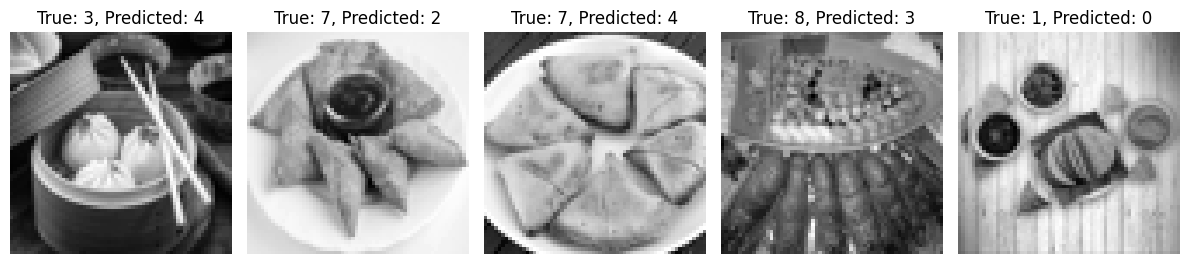

In [99]:
import matplotlib.pyplot as plt
import random

# Obtener algunas imágenes al azar del conjunto de prueba
num_images_to_display = 5
random_indices = random.sample(range(len(test_categorias_x)), num_images_to_display)
images_to_display = test_categorias_x[random_indices]
labels_to_display = test_categorias_y[random_indices]

# Realizar predicciones con el modelo
predictions = model.predict(images_to_display)
predicted_labels = np.argmax(predictions, axis=1)

# Mostrar las imágenes y sus predicciones
plt.figure(figsize=(12, 8))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(images_to_display[i].reshape(num_px, num_px), cmap='gray')
    plt.title(f"True: {labels_to_display[i]}, Predicted: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
